
# SESSION: Simulating time series signal and noise #3.26. Generating pink and white noise data

COURSE: Neural signal processing and analysis: Zero to hero

TEACHER: Mike X Cohen, sincxpress.com

**Goal:** Synthesize different examples of pink and white noise

In [134]:
# always remember to do imports first!
import matplotlib.pyplot as plt
import numpy as np

## Normally Distributed Data (White Noise)

First, we must set our parameters below for the simulated data.

In [135]:
# simulation details
srate = 100 #sampling rate in hz
time = np.linspace(-1.000,1.000,num=srate*2) #our min and max times span 2 seconds, so we need twice the number of samples given in our sampling rate
pnts = len(time)

# frequencies for the power spectrum
hz = np.linspace(0,srate/2,int(pnts/2)-1) 

# noise parameters
stretch = 3
shift = 0

# initialize the random number generator
rng = np.random.default_rng() # optional = set seed to an integer to lock in the rng

Now, we can generate the data.

In [136]:
# generate random data
noise = rng.normal(loc = shift, scale = stretch, size=pnts)

We can plot our random noise next.

Text(0.5, 1.0, 'Frequency Domain')

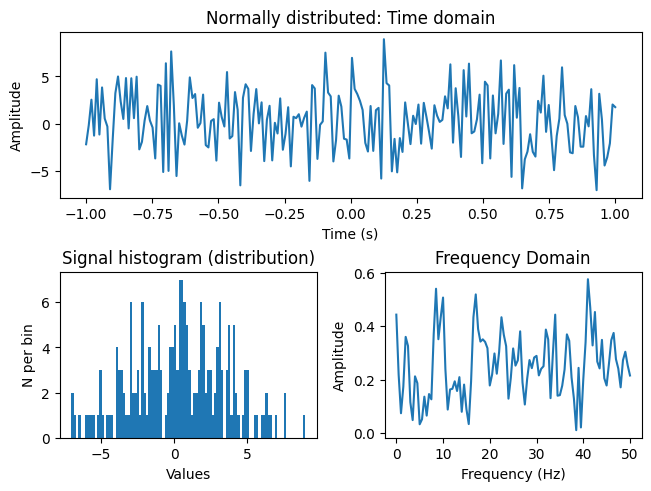

In [137]:
# make a 4 (2 x 2) panel plot in matplotlib
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["time", "time"],
        ["hist", "freq"],
    ],
)

# plot the top panel with normally distributed time domain data
# x = time(s), y = amplitude
ax_dict["time"].plot(time,noise)
ax_dict["time"].set_xlabel("Time (s)")
ax_dict["time"].set_ylabel("Amplitude")
ax_dict["time"].set_title('Normally distributed: Time domain')

# plot the bottom left with signal histogram
# x = "values", y = "n per bin"
ax_dict["hist"].hist(noise,100)
ax_dict["hist"].set_xlabel("Values")
ax_dict["hist"].set_ylabel("N per bin")
ax_dict["hist"].set_title('Signal histogram (distribution)')

# plot the bottom right with the frequency domain
# x = freq(hz), y = amplitude
ax_dict["freq"].magnitude_spectrum(noise, Fs = srate) # convenient matplotlib function for plotting the frequency domain without needing to manually calculate the fourier transform
ax_dict["freq"].set_xlabel("Frequency (Hz)")
ax_dict["freq"].set_ylabel("Amplitude")
ax_dict["freq"].set_title('Frequency Domain')
